<h1 style="color:white;background-color:black;text-align:center;font-size:350%;font-family:monotype corsiva">Karan Agrawal</h1><h2 style="color:white;background-color:black;text-align:center;font-size:250%;font-family:monotype corsiva">Predicting MPG</h2>

> ## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

> ## **Import Dataset**

In [2]:
df=sns.load_dataset("mpg")

> ## **Exploratory Data Analysis**

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
df.shape

(398, 9)

#### We have-> 398 Entries and 9 Features

In [5]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

#### Deal with missing values

In [6]:
df.horsepower.isna().sum()

6

#### We can do many things with this column:
* We can drop whole column but we will not because null values are only 6 out of 398 values.
* We can use mean , median or mode but it can bias our data as we have high variability in data.
* We can leave it NA but horsepower is an important feature to predict mileage
* __We will delete the rows because there are only 6 values which will not effect data too much.__

In [7]:
df.dropna(axis=0,how='any',inplace=True)

In [8]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


#### Let us extract our target variable as target series from dataset

In [9]:
target=pd.Series(df["mpg"],name="mpg")

In [10]:
target

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

#### Drop mpg from df

In [11]:
df.drop("mpg",axis=1,inplace=True)

In [12]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,4,120.0,79.0,2625,18.6,82,usa,ford ranger


> ## **Feature Selection**

#### Let us see dependencies of all variables on target variable

In [13]:
for column in df.columns[:-2]:
    print(column,"->",np.corrcoef(df[column],target)[0][1])

cylinders -> -0.7776175081260225
displacement -> -0.8051269467104579
horsepower -> -0.7784267838977762
weight -> -0.8322442148315754
acceleration -> 0.4233285369027873
model_year -> 0.5805409660907852


#### As origin is Categorical Variable we cannot have it's correlation coefficient.

#### As we can see `mpg` is highly dependent on `weight`,`displacement`,`horsepower` and `cylinders`.
#### And it is moderately dependent upon `accleration` and `model_year`.

#### Name is not an important feature for our model and origin is categorical so we can drop them both.

In [14]:
df.drop(["name","origin"],axis=1,inplace=True)

In [15]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


#### We can also see above relations via *scatter plot*.

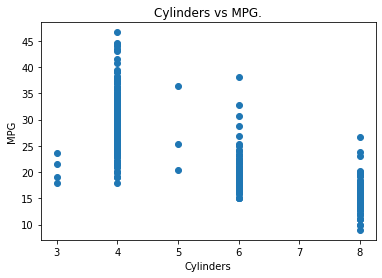

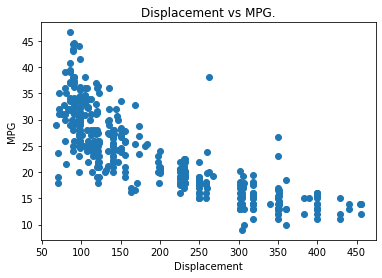

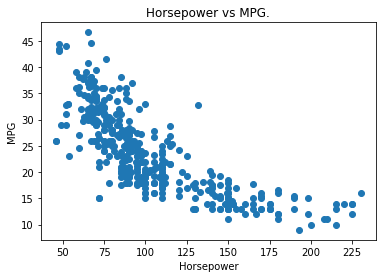

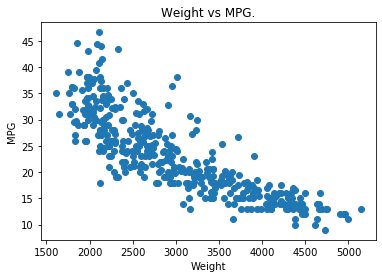

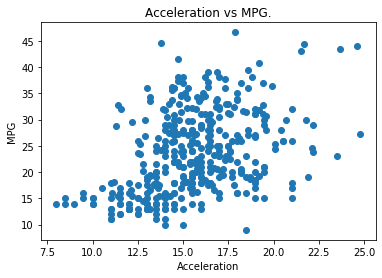

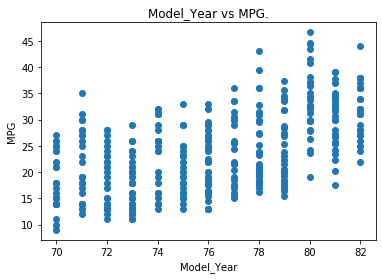

In [16]:
for column in df.columns:
    plt.scatter(df[column],target)
    plt.title(f"{column.title()} vs MPG.")
    plt.xlabel(column.title())
    plt.ylabel("MPG")
    plt.show()

> ## **Split the Data for Training and Testing**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(df,target,test_size=0.25,shuffle=True)

#### We have choosen test size 0.25 because we have limited data.

In [19]:
x_train.shape

(294, 6)

In [20]:
x_test.shape

(98, 6)

In [21]:
y_train.shape

(294,)

In [22]:
y_test.shape

(98,)

In [23]:
x_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
265,8,318.0,140.0,4080,13.7,78
110,4,108.0,94.0,2379,16.5,73
246,4,78.0,52.0,1985,19.4,78
23,4,121.0,113.0,2234,12.5,70
280,6,231.0,115.0,3245,15.4,79


> ## **Model Selection and Creating Model**

#### We will choose Linear Regression Because i have only learnt linear regression till now 😁.

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()

> ## **Fit the model with Train Data**

In [26]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.intercept_

-12.334814754841435

In [28]:
model.coef_

array([-3.13762513e-01,  2.03114780e-04,  2.11129763e-03, -6.20893331e-03,
        2.97849717e-02,  7.28460987e-01])

#### Our Equation becomes

In [29]:
eq=str(model.intercept_)
for i in range(6):
    eq+=" + ("+str(df.columns[i])+" * "+str(model.coef_[i])+")"
print(eq)

-12.334814754841435 + (cylinders * -0.31376251329664745) + (displacement * 0.00020311477985437802) + (horsepower * 0.0021112976290110904) + (weight * -0.006208933306974987) + (acceleration * 0.029784971709372568) + (model_year * 0.728460986986503)


> ## **Model Evaluation**

In [30]:
y_pred=model.predict(x_test)

In [31]:
y_pred[:5]

array([25.06229162, 20.34102047, 11.77659846, 31.07256601, 32.30271673])

In [32]:
y_test.to_list()[:5]

[22.0, 18.0, 13.0, 29.0, 33.7]

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
mse=mean_squared_error(y_test,y_pred)

In [35]:
mse

12.230299015244213

In [36]:
mae=mean_absolute_error(y_test,y_pred)

In [37]:
mae

2.8184484882723098

In [38]:
r_sc=r2_score(y_test,y_pred)

In [39]:
r_sc

0.7986836158776395

#### Our Accuracy is about 78%.

#### We can visualise accuracy by _scatter plot_ also.

 Cylinders Corr Coeff: -0.78 


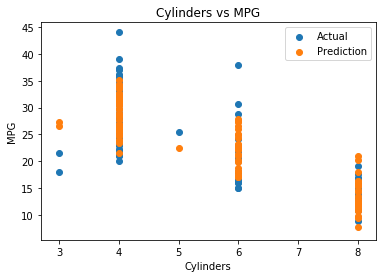

Displacement Corr Coeff: -0.81 


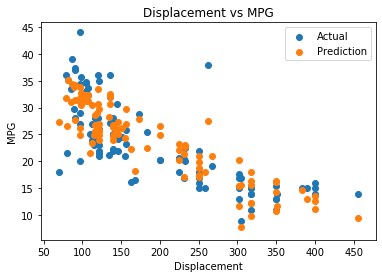

Horsepower Corr Coeff: -0.78 


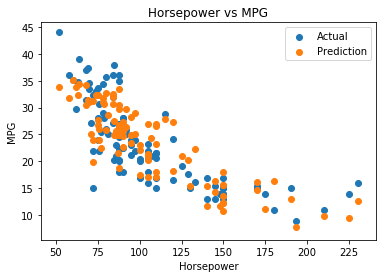

    Weight Corr Coeff: -0.83 


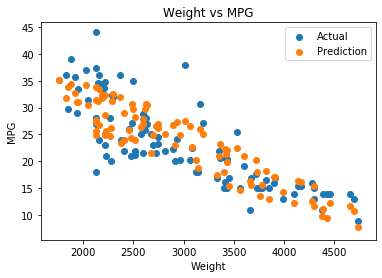

Acceleration Corr Coeff:  0.42 


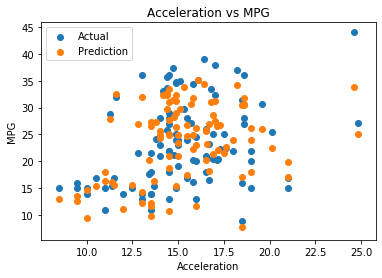

Model_Year Corr Coeff:  0.58 


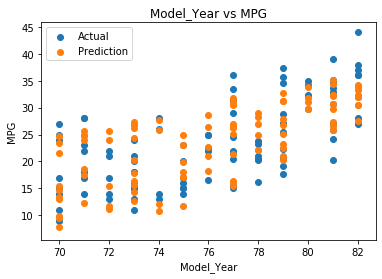

In [40]:
for col in df.columns:
    print(f"{col.title():>10} Corr Coeff: {np.corrcoef(df[col], target)[0][1]:>5.2f} ")
    plt.scatter(x_test[col], y_test, label='Actual')
    plt.scatter(x_test[col], y_pred, label='Prediction')
    plt.xlabel(col.title())
    plt.ylabel('MPG')
    plt.title(f"{col.title()} vs MPG")
    plt.legend()
    plt.show()

#### Our Prediction seems to be correct and well fitted

> ## **Serialise the model**

In [41]:
import pickle
fp=open("model.pkl","wb")
pickle.dump(model,fp)
fp.close()

#### We have serialised model object succesfully.

> ## **Deploy the model using tkinter application**

In [42]:
#modules
from tkinter import *
import pickle

#root window
root=Tk()

#to clear the entry box
def clear():
    c_var.set("")
    d_var.set("")
    h_var.set("")
    w_var.set("")
    a_var.set("")
    m_var.set("")

#to predict mpg
def calculate_mpg():
    c=c_var.get()
    d=d_var.get()
    h=h_var.get()
    w=w_var.get()
    a=a_var.get()
    m=m_var.get()
    clear()
    fp=open("model.pkl","rb")
    model=pickle.load(fp)
    mpg=model.predict(np.array([c,d,h,w,a,m]).reshape(1,-1))
    t=Toplevel()
    label=Label(t,text=f"Your Car's \n Predicted Mileage is \n{mpg[0]:.2f} Miles Per Gallon.")
    label.config(bg='#123456', fg='wheat', font=('monospace', 35, 'bold'),height=5,width=21)
    label.pack()
    button=Button(t,text="Quit",command=t.destroy)
    button.config(bg='wheat', fg='red', font=('monospace', 35, 'bold'),height=1,width=21)
    button.pack()
    t.resizable(0,0)
    
    
#variables   
c_var=DoubleVar()
d_var=DoubleVar()
h_var=DoubleVar()
w_var=DoubleVar()
a_var=DoubleVar()
m_var=DoubleVar()

clear()

#labels
c_label=Label(root,text="Cylinders:")
d_label=Label(root,text="Displacement:")
h_label=Label(root,text="Horsepower:")
w_label=Label(root,text="Weight:")
a_label=Label(root,text="Accleration:")
m_label=Label(root,text="Model Year:")

# entry boxes
c_entry=Entry(root,textvariable=c_var)
d_entry=Entry(root,textvariable=d_var)
h_entry=Entry(root,textvariable=h_var)
w_entry=Entry(root,textvariable=w_var)
a_entry=Entry(root,textvariable=a_var)
m_entry=Entry(root,textvariable=m_var)

#buttons
button_1=Button(root,text="Calculate MPG",command=calculate_mpg)
button_2=Button(root,text="Quit",command=root.destroy)

#packing all widgets
c_label.grid(row=1,column=1,)
c_entry.grid(row=1,column=2,)
d_label.grid(row=2,column=1,)
d_entry.grid(row=2,column=2,)
h_label.grid(row=3,column=1,)
h_entry.grid(row=3,column=2,)
w_label.grid(row=4,column=1,)
w_entry.grid(row=4,column=2,)
a_label.grid(row=5,column=1,)
a_entry.grid(row=5,column=2,)
m_label.grid(row=6,column=1,)
m_entry.grid(row=6,column=2,)
button_1.grid(row=7,column=1,columnspan=2,sticky=W+E+N+S)
button_2.grid(row=8,column=1,columnspan=2,sticky=W+E+N+S)

c_entry.focus()

#configurations
c_label.config(bg="wheat",fg='#123456', font=('monospace', 25, 'bold'))
d_label.config(bg="wheat",fg='#123456', font=('monospace', 25, 'bold'))
h_label.config(bg="wheat",fg='#123456', font=('monospace', 25, 'bold'))
w_label.config(bg="wheat",fg='#123456', font=('monospace', 25, 'bold'))
a_label.config(bg="wheat",fg='#123456', font=('monospace', 25, 'bold'))
m_label.config(bg="wheat",fg='#123456', font=('monospace', 25, 'bold'))
c_entry.config(bg='#123456', fg='wheat', font=('monospace', 25, 'bold'))
d_entry.config(bg='#123456', fg='wheat', font=('monospace', 25, 'bold'))
h_entry.config(bg='#123456', fg='wheat', font=('monospace', 25, 'bold'))
w_entry.config(bg='#123456', fg='wheat', font=('monospace', 25, 'bold'))
a_entry.config(bg='#123456', fg='wheat', font=('monospace', 25, 'bold'))
m_entry.config(bg='#123456', fg='wheat', font=('monospace', 25, 'bold'))
button_1.config(bg='wheat', fg='green', font=('monospace', 25, 'bold'),relief="raised")
button_2.config(bg='wheat', fg='red', font=('monospace', 25, 'bold'),relief="raised")
root.config(bg="wheat")
root.title("MPG Prediction")
root.resizable(0,0)

root.mainloop()

#### We have now Deployed our Application Localy.

<h2 style="color:white;background-color:black;text-align:center;font-size:250%;font-family:monotype corsiva">Thank You</h2>